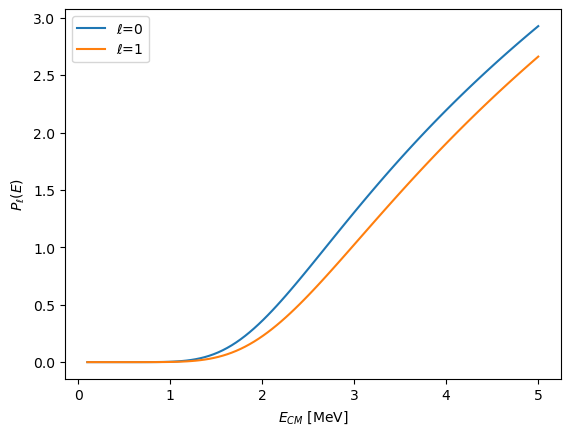

In [67]:
# Reference: https://www.osti.gov/servlets/purl/1281675

from mpmath import *
import numpy as np
import matplotlib.pyplot as plt

def F(l, eta, z):
    out = []
    for n in range(len(eta)):
        out.append(coulombf(l,eta[n],z[n]))
    return np.array(out)

def G(l, eta, z):
    out = []
    for n in range(len(eta)):
        out.append(coulombg(l,eta[n],z[n]))
    return np.array(out)

#Constants
hbar = 197 #MeV/fm
e2 = 1.6e-19**2
amu = 931.5 #MeV/c2
alpha = 1./137.
#Inputs
l = 0
M1 = 12 #in amu
M2 = 4 #in amu
a = 1.4*(M1**(1/3)+M2**(1/3)) #fm
Z1 = 6 #in units of e
Z2 = 2 #in units of e
mu = (M1*M2)/(M1+M2)
E = np.linspace(0.1,5,101) #MeV

#
k = np.sqrt((2*mu*amu*E))/hbar #fm^-1
eta = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*E))
z = k*a

penL0 = z/(F(0,eta,z)**2+G(0,eta,z)**2) #Penetrability = ka/(F^2+G^2)
penL1 = z/(F(1,eta,z)**2+G(1,eta,z)**2)

plt.plot(E,penL0,label="$\ell$=0")
plt.plot(E,penL1,label="$\ell$=1")
#plt.yscale('log')
plt.xlabel("$E_{CM}$ [MeV]")
plt.ylabel("$P_{\ell}(E)$")
plt.legend()
plt.show()